In [1]:
import diptest
import glob
import joypy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
files_s = sorted(glob.glob('../../input/*.txt'))

#### Loading the data

In [3]:
data_s = []
for i, filename in enumerate(files_s):
    df = pd.read_csv(filename, header=None, names=['left', 'right', 'slider'])
    for j in range(190):
        data_s.append([f'Part. {str(i+1).zfill(2)}', df['slider'].iloc[j]])
data_s = pd.DataFrame(data_s, columns=['Part', 'Slider'])
print(data_s.shape)

(2470, 2)


#### Unimodality test

In [4]:
for i in range(13):
    data_part = data_s.iloc[i*190:(i+1)*190, 1].values    
    print(f'Part. {i+1}: {diptest.dipstat(data_part)}')

Part. 1: 0.05592105263157895
Part. 2: 0.10263157894736842
Part. 3: 0.09736842105263158
Part. 4: 0.034210526315789476
Part. 5: 0.07456140350877194
Part. 6: 0.09769736842105263
Part. 7: 0.08157894736842106
Part. 8: 0.08888888888888889
Part. 9: 0.1
Part. 10: 0.10263157894736842
Part. 11: 0.09210526315789473
Part. 12: 0.021052631578947368
Part. 13: 0.0868421052631579


#### Distribution participants

In [5]:
part_s = [1, 4, 12]
for i in range(13):
    if i+1 in part_s:
        data_part = data_s.iloc[i*190:(i+1)*190, 1].values
        print(i+1)
        print(np.unique(data_part, return_counts=True))
        print((np.unique(data_part, return_counts=True)[1] / 190) * 100)
        print()

1
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([105,   2,   9,  13,  19,   6,  11,  10,  10,   2,   3]))
[55.26315789  1.05263158  4.73684211  6.84210526 10.          3.15789474
  5.78947368  5.26315789  5.26315789  1.05263158  1.57894737]

4
(array([ 0,  1,  2,  3,  4,  7, 10]), array([163,  13,   6,   4,   2,   1,   1]))
[85.78947368  6.84210526  3.15789474  2.10526316  1.05263158  0.52631579
  0.52631579]

12
(array([0, 1]), array([182,   8]))
[95.78947368  4.21052632]



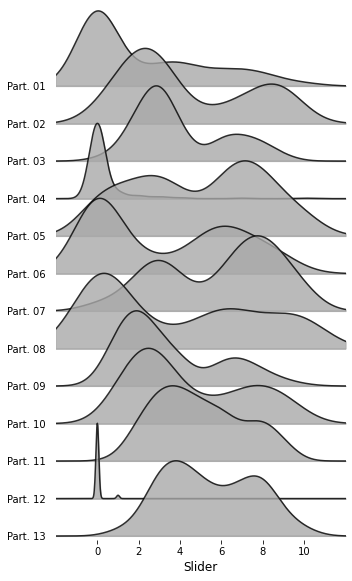

In [6]:
joypy.joyplot(data_s, by="Part", figsize=(5, 8), ylim='own', alpha=0.8, color='darkgray')
plt.xlabel('Slider', fontsize=12)
plt.savefig('output/fig/dist_slider.png', dpi=100)